In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')

# Display basic info
df.info()

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [8]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert numerical columns from object to numeric
numeric_columns = [
    '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow',
    'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 
    'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 
    'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 
    'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 
    'Flotation Column 01 Level', 'Flotation Column 02 Level', 
    'Flotation Column 03 Level', 'Flotation Column 04 Level', 
    'Flotation Column 05 Level', 'Flotation Column 06 Level', 
    'Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for any remaining NaNs after conversion
df.isnull().sum()


date                                 0
% Iron Feed                     734213
% Silica Feed                   736373
Starch Flow                     731081
Amina Flow                      736768
Ore Pulp Flow                   736890
Ore Pulp pH                     737413
Ore Pulp Density                737453
Flotation Column 01 Air Flow    736850
Flotation Column 02 Air Flow    736803
Flotation Column 03 Air Flow    736843
Flotation Column 04 Air Flow    737075
Flotation Column 05 Air Flow    737066
Flotation Column 06 Air Flow    736757
Flotation Column 07 Air Flow    736766
Flotation Column 01 Level       736719
Flotation Column 02 Level       736687
Flotation Column 03 Level       736673
Flotation Column 04 Level       736277
Flotation Column 05 Level       736714
Flotation Column 06 Level       736687
Flotation Column 07 Level       736692
% Iron Concentrate              728091
% Silica Concentrate            730253
dtype: int64

In [9]:
# Descriptive statistics
df[numeric_columns].describe()


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,3240.000000,1080.0,6372.000000,685.000000,563.000000,40.0,0.0,603.000000,650.000000,610.000000,...,687.000000,734.000000,766.000000,780.00000,1176.000000,739.000000,766.000000,761.000000,9362.000000,7200.000000
mean,57.500000,18.0,3248.887633,500.243796,397.584369,10.0,NaN,282.407960,280.627692,285.381967,...,293.414847,507.013624,507.317232,497.75641,426.301871,429.515562,421.861619,433.783180,64.595920,1.900000
std,1.500232,0.0,923.751961,81.062086,8.089880,0.0,NaN,27.375318,27.127613,24.273415,...,27.137722,102.522735,109.034874,110.19532,81.881418,75.448151,80.050746,85.273795,1.259781,0.916579
min,56.000000,18.0,110.000000,249.000000,377.000000,10.0,NaN,199.000000,194.000000,199.000000,...,240.000000,163.000000,226.000000,130.00000,175.000000,251.000000,165.000000,235.000000,63.000000,1.000000
25%,56.000000,18.0,2500.000000,448.000000,395.000000,10.0,NaN,250.000000,251.000000,252.000000,...,291.000000,431.500000,437.250000,418.00000,366.000000,366.500000,364.250000,361.000000,63.000000,1.000000
50%,57.500000,18.0,3287.000000,512.000000,399.000000,10.0,NaN,300.000000,297.000000,299.000000,...,300.000000,499.500000,489.000000,457.00000,425.000000,423.000000,400.000000,421.000000,65.000000,2.000000
75%,59.000000,18.0,3882.000000,557.000000,403.000000,10.0,NaN,300.000000,301.000000,300.000000,...,302.000000,564.000000,576.750000,573.00000,490.000000,481.000000,486.750000,501.000000,66.000000,2.000000
max,59.000000,18.0,6268.000000,734.000000,418.000000,10.0,NaN,311.000000,313.000000,304.000000,...,367.000000,849.000000,822.000000,884.00000,675.000000,669.000000,660.000000,645.000000,67.000000,5.000000


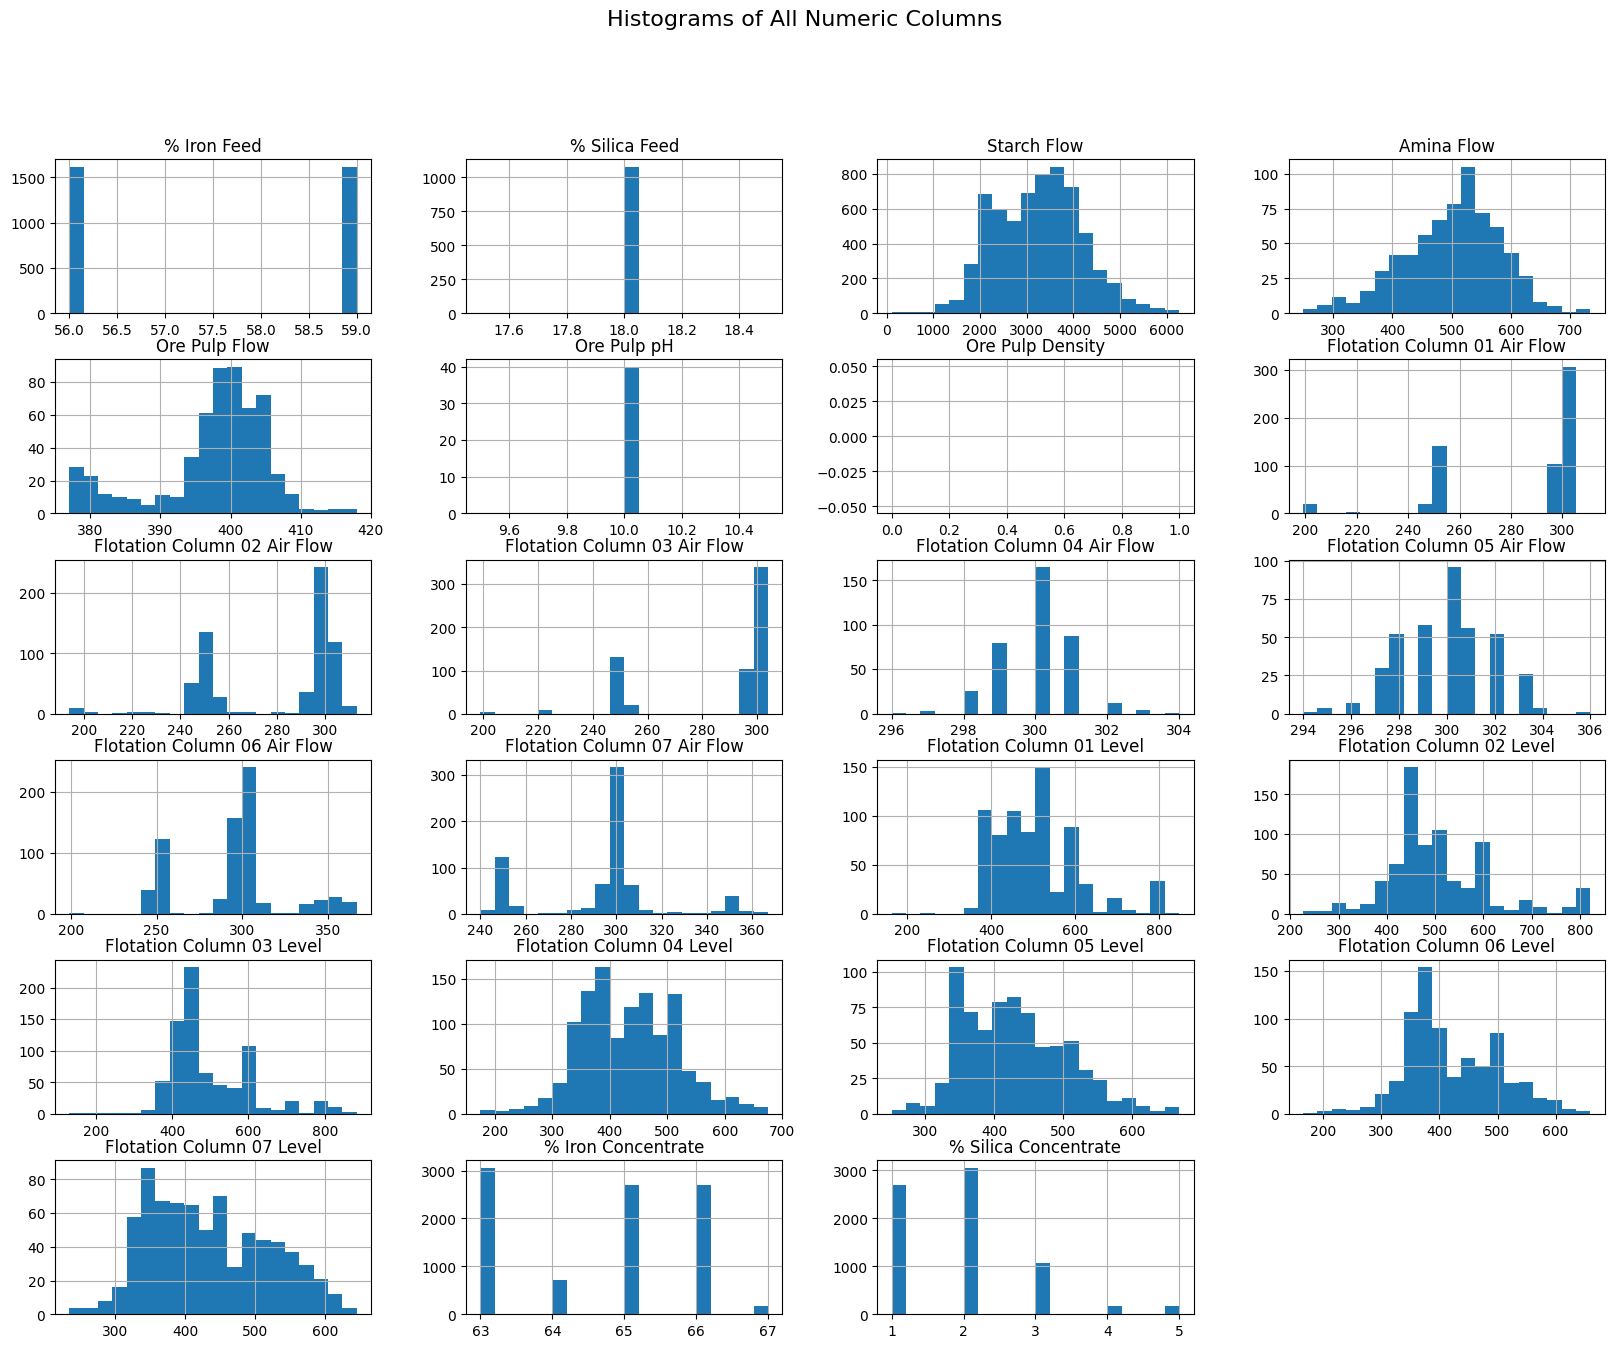

In [10]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df[numeric_columns].hist(bins=20, figsize=(20, 15), layout=(6, 4))
plt.suptitle("Histograms of All Numeric Columns", fontsize=16)
plt.show()


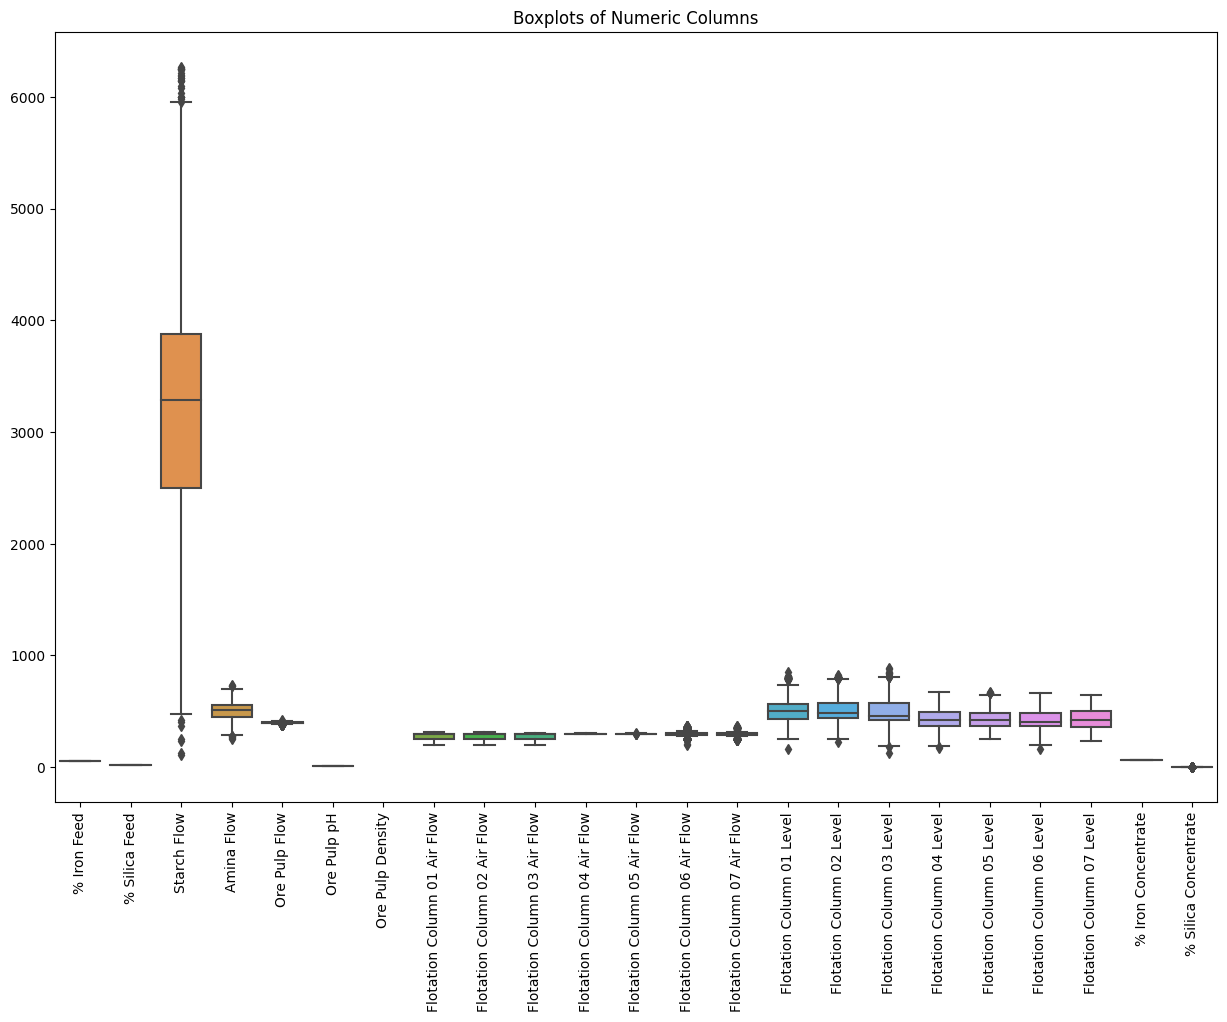

In [11]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Columns")
plt.show()


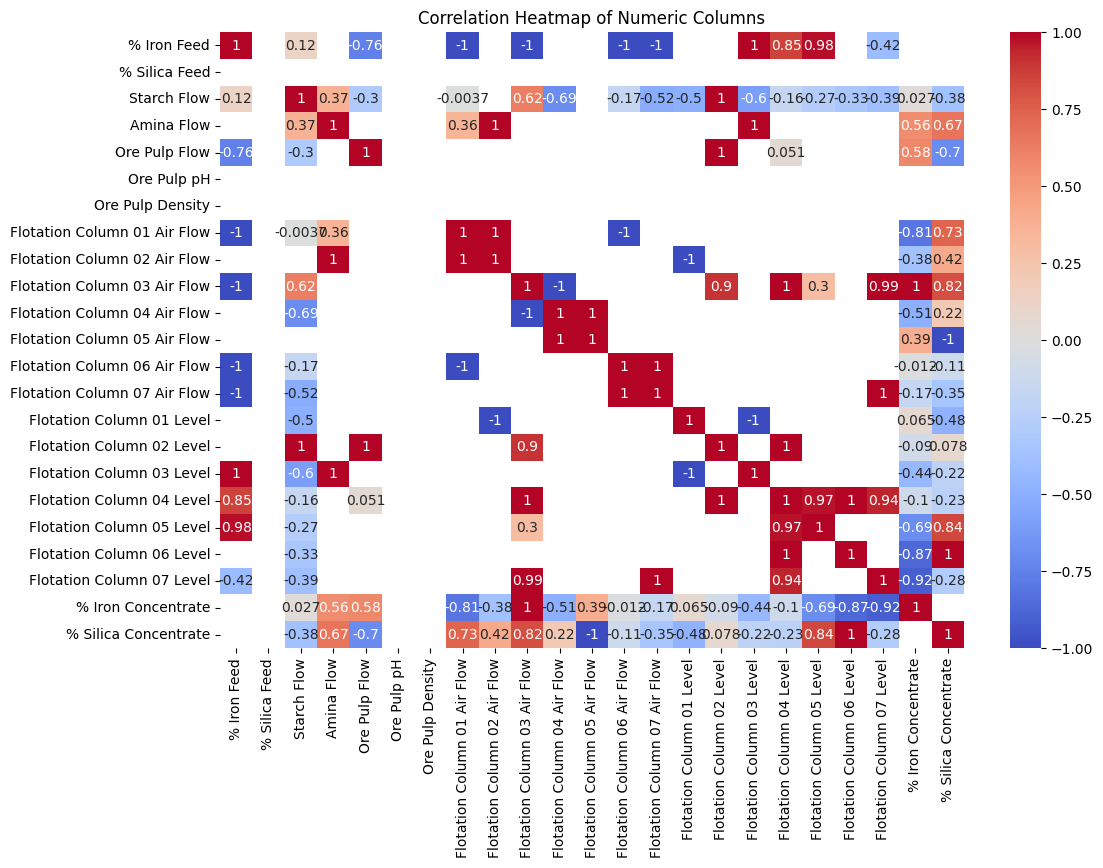

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


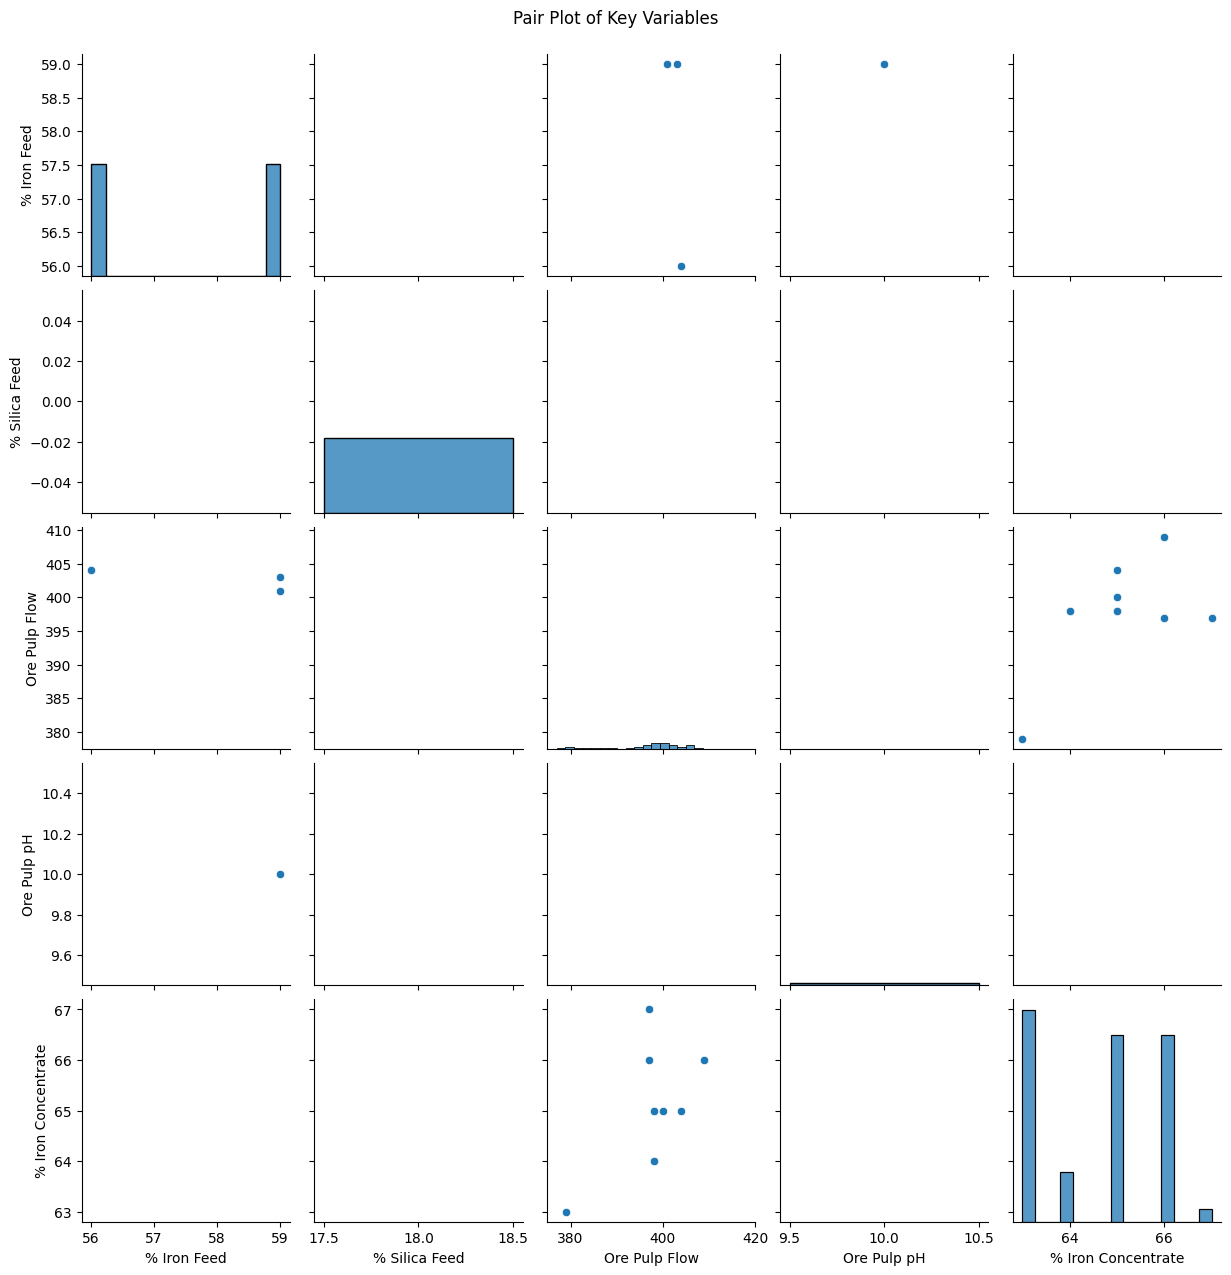

In [13]:
key_columns = ['% Iron Feed', '% Silica Feed', 'Ore Pulp Flow', 'Ore Pulp pH', '% Iron Concentrate']
sns.pairplot(df[key_columns])
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()


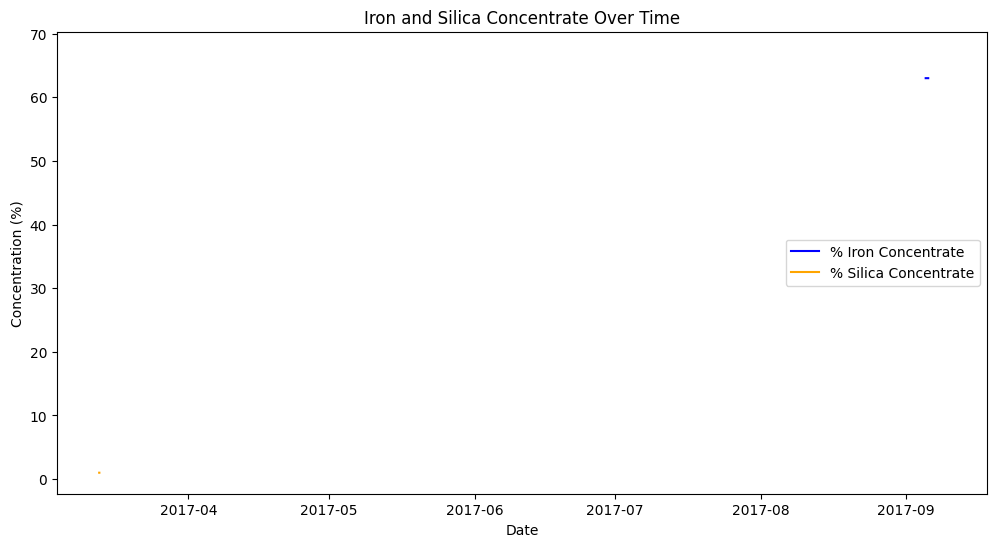

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['% Iron Concentrate'], label="% Iron Concentrate", color='blue')
plt.plot(df['date'], df['% Silica Concentrate'], label="% Silica Concentrate", color='orange')
plt.xlabel("Date")
plt.ylabel("Concentration (%)")
plt.title("Iron and Silica Concentrate Over Time")
plt.legend()
plt.show()


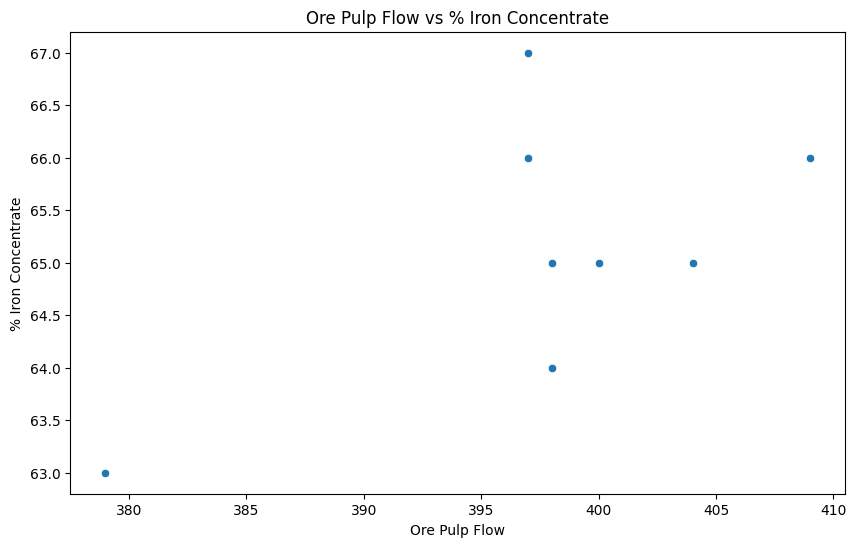

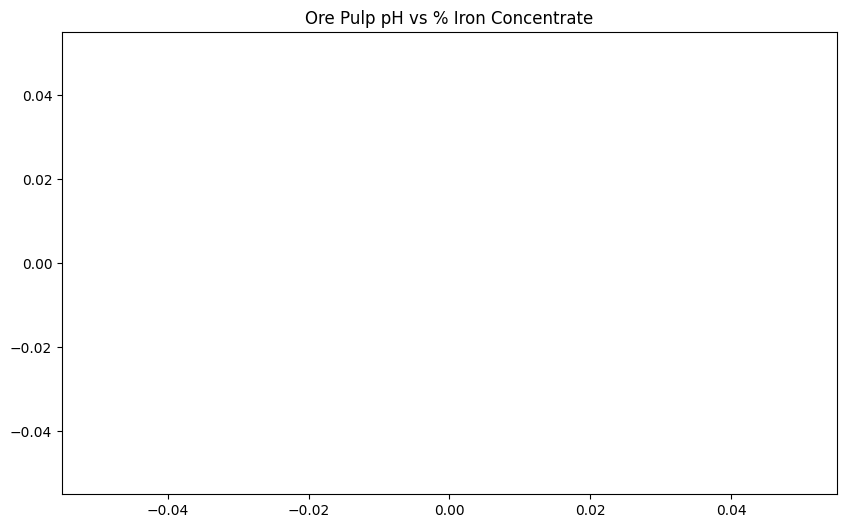

In [18]:
# Scatter plot to see Ore Pulp Flow vs Iron Concentrate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ore Pulp Flow', y='% Iron Concentrate', data=df)
plt.title("Ore Pulp Flow vs % Iron Concentrate")
plt.show()

# Scatter plot for Ore Pulp pH vs Iron Concentrate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ore Pulp pH', y='% Iron Concentrate', data=df)
plt.title("Ore Pulp pH vs % Iron Concentrate")
plt.show()


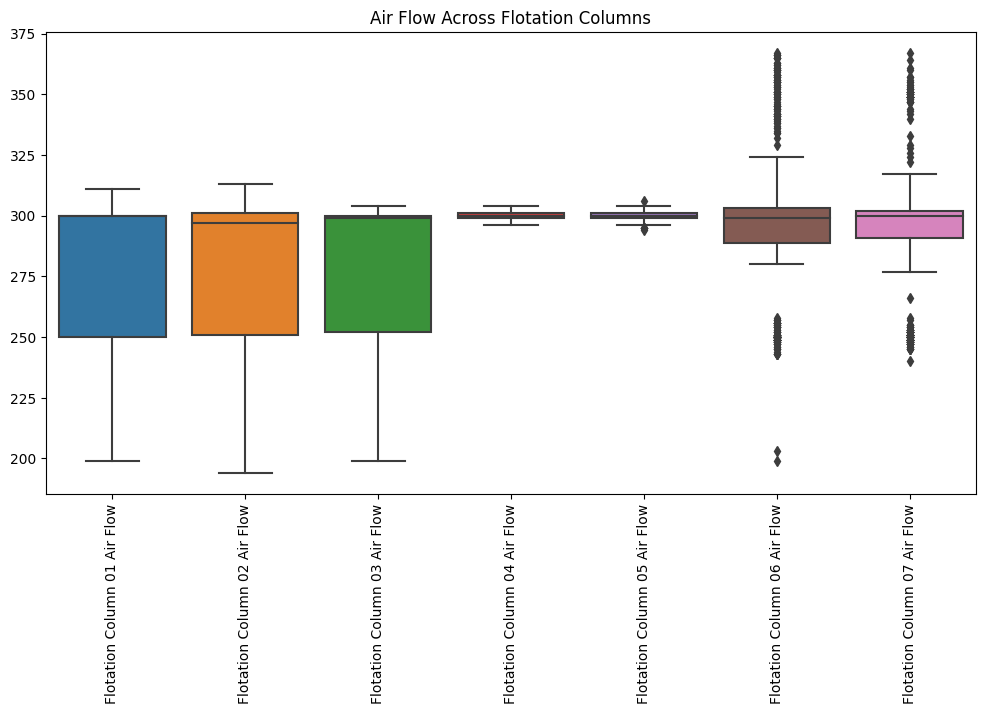

In [19]:
columns_air_flow = [
    'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 
    'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 
    'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 
    'Flotation Column 07 Air Flow'
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_air_flow])
plt.xticks(rotation=90)
plt.title("Air Flow Across Flotation Columns")
plt.show()


In [20]:
from scipy.stats import zscore

# Calculate Z-score and filter outliers for Iron Feed
df['Iron Feed Z-Score'] = zscore(df['% Iron Feed'])
outliers = df[(df['Iron Feed Z-Score'] > 3) | (df['Iron Feed Z-Score'] < -3)]
outliers[['date', '% Iron Feed', 'Iron Feed Z-Score']]


,date,% Iron Feed,Iron Feed Z-Score


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Select relevant features and target variable
X = df[['% Iron Feed', '% Silica Feed', 'Ore Pulp Flow', 'Ore Pulp pH']]
y = df['% Iron Concentrate']

# Impute missing values in X and y
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X.values)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.019662573234733197
R2 Score: -4.255546186082704e-05


In [24]:
df['Efficiency Ratio'] = df['% Iron Concentrate'] / df['% Iron Feed']
df['Efficiency Ratio'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Efficiency Ratio, dtype: float64

In [25]:
df['pH_Density_Interaction'] = df['Ore Pulp pH'] * df['Ore Pulp Density']


In [26]:
df['Iron_Concentrate_Rolling_Mean'] = df['% Iron Concentrate'].rolling(window=5).mean()
df['Iron_Concentrate_Rolling_Std'] = df['% Iron Concentrate'].rolling(window=5).std()


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


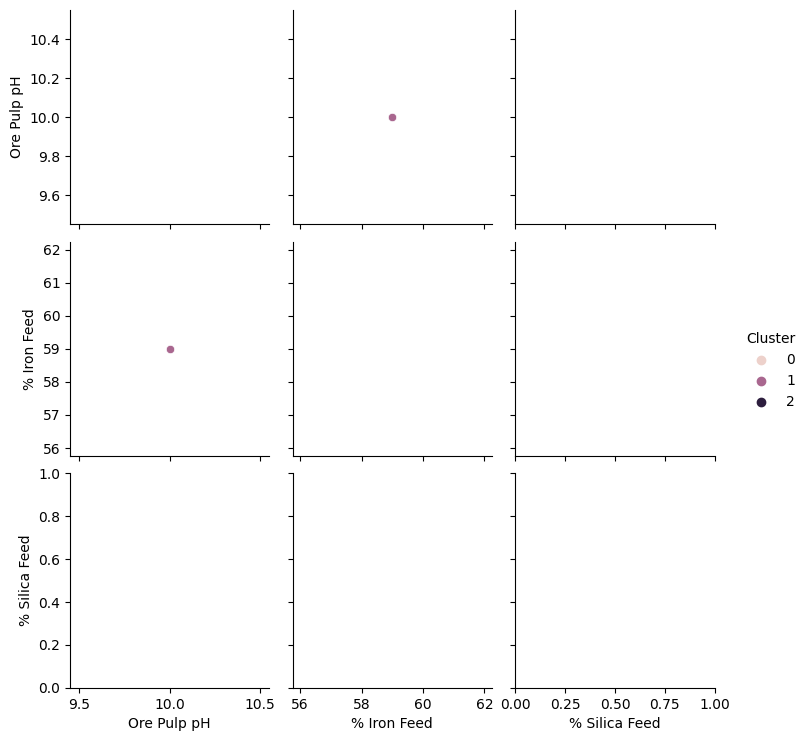

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for clustering
data_for_clustering = df[['Ore Pulp pH', '% Iron Feed', '% Silica Feed']]

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_for_clustering)

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters
sns.pairplot(df, hue='Cluster', vars=['Ore Pulp pH', '% Iron Feed', '% Silica Feed'])
plt.show()



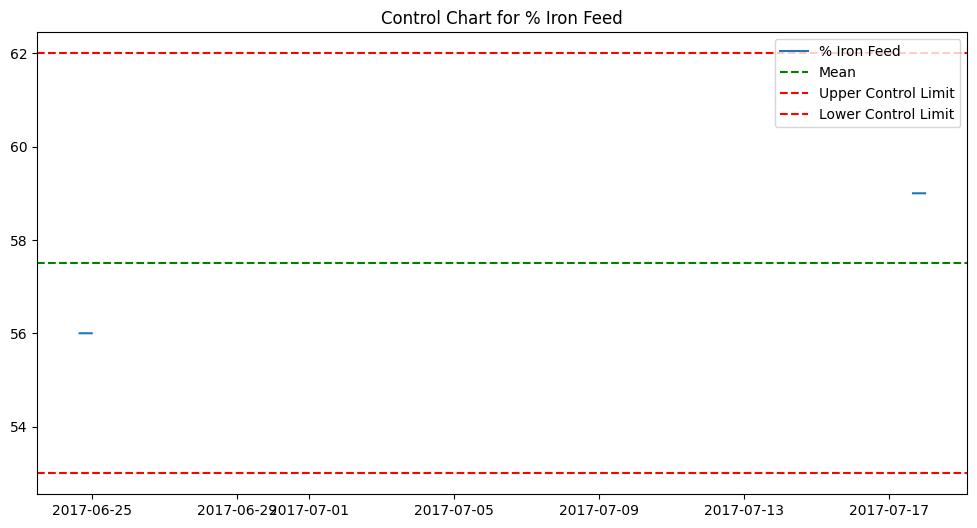

In [29]:
mean_iron = df['% Iron Feed'].mean()
std_iron = df['% Iron Feed'].std()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['% Iron Feed'], label="% Iron Feed")
plt.axhline(mean_iron, color='green', linestyle='--', label="Mean")
plt.axhline(mean_iron + 3*std_iron, color='red', linestyle='--', label="Upper Control Limit")
plt.axhline(mean_iron - 3*std_iron, color='red', linestyle='--', label="Lower Control Limit")
plt.legend()
plt.title("Control Chart for % Iron Feed")
plt.show()


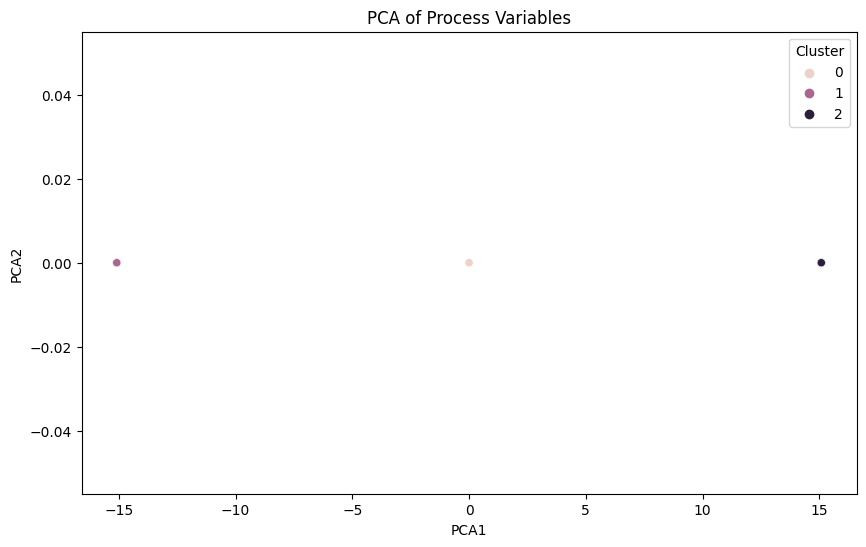

In [30]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_results[:, 0], pca_results[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df)
plt.title("PCA of Process Variables")
plt.show()


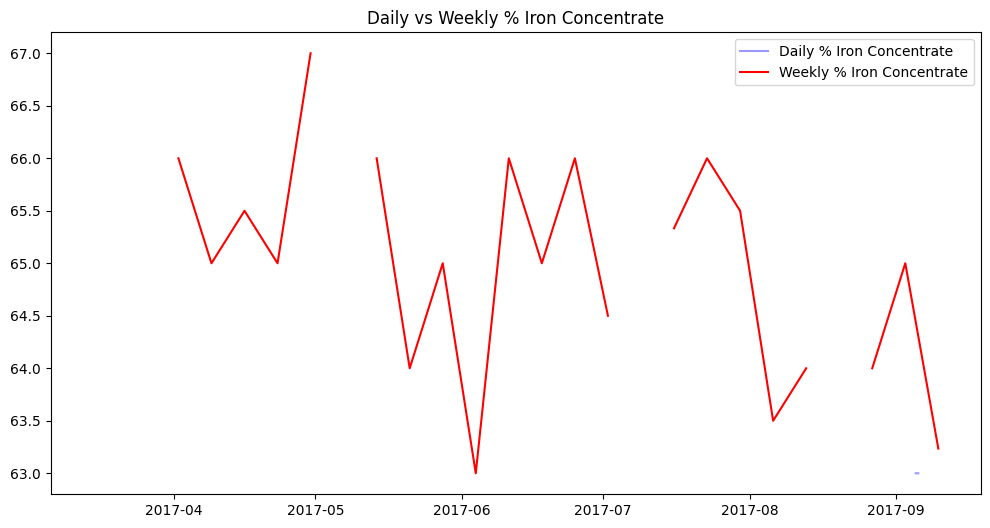

In [31]:
# Weekly averages
weekly_df = df.set_index('date').resample('W').mean()

# Plot weekly vs daily
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['% Iron Concentrate'], label='Daily % Iron Concentrate', color='blue', alpha=0.4)
plt.plot(weekly_df.index, weekly_df['% Iron Concentrate'], label='Weekly % Iron Concentrate', color='red')
plt.legend()
plt.title("Daily vs Weekly % Iron Concentrate")
plt.show()


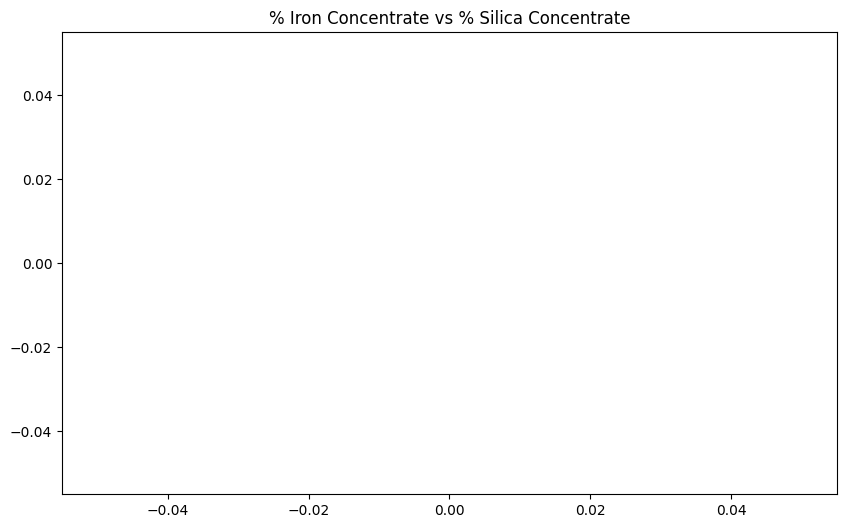

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% Iron Concentrate', y='% Silica Concentrate', data=df)
plt.title("% Iron Concentrate vs % Silica Concentrate")
plt.show()


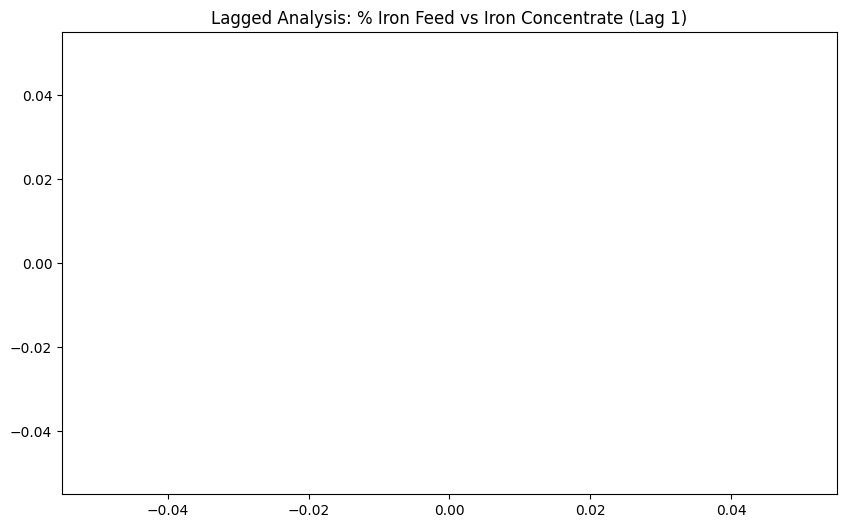

In [38]:
df['Iron_Concentrate_Lag'] = df['% Iron Concentrate'].shift(1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% Iron Feed', y='Iron_Concentrate_Lag', data=df)
plt.title("Lagged Analysis: % Iron Feed vs Iron Concentrate (Lag 1)")
plt.show()





In [40]:
# Example: classify shifts based on time
df['Shift'] = df['date'].dt.hour.apply(lambda x: 'Morning' if 6 <= x < 14 else 'Evening' if 14 <= x < 22 else 'Night')
df.groupby('Shift')[['% Iron Concentrate', '% Silica Concentrate']].mean()



,% Iron Concentrate,% Silica Concentrate
Shift,,
Evening,64.5500,1.833333
Morning,64.3995,2.181818
Night,65.0000,1.764706


In [41]:
from scipy.stats import ttest_ind

# Divide into two groups
high_silica = df[df['% Silica Feed'] > df['% Silica Feed'].median()]['% Iron Concentrate']
low_silica = df[df['% Silica Feed'] <= df['% Silica Feed'].median()]['% Iron Concentrate']

# Perform t-test
t_stat, p_val = ttest_ind(high_silica, low_silica)
print(f"T-test p-value: {p_val}")


T-test p-value: nan


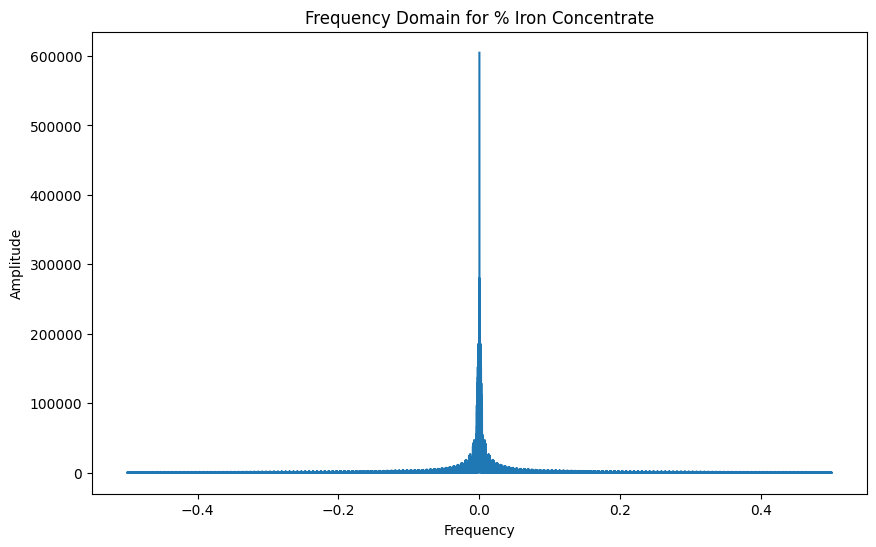

In [42]:
import numpy as np

# Fourier Transform for % Iron Concentrate
iron_fft = np.fft.fft(df['% Iron Concentrate'].fillna(0))
frequencies = np.fft.fftfreq(len(iron_fft))

# Plot frequency domain
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(iron_fft))
plt.title("Frequency Domain for % Iron Concentrate")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6568\2494046950.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


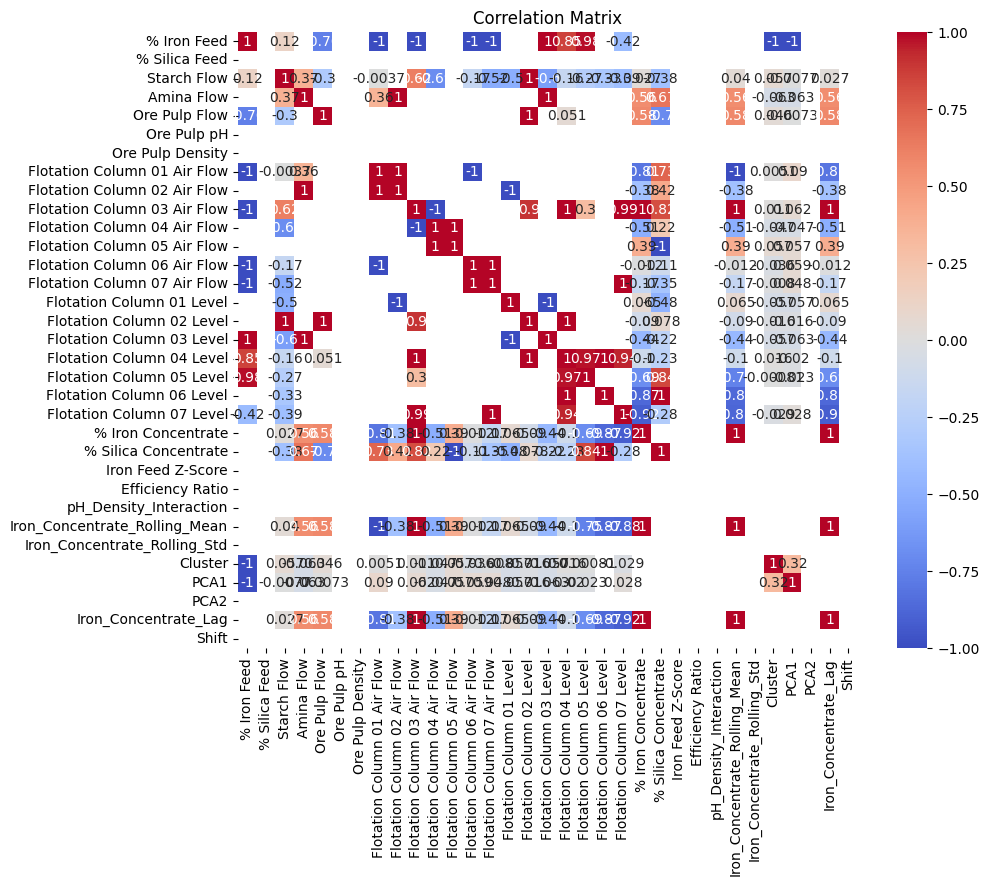

In [43]:
# Convert columns to numeric
for col in df.columns[1:]:  # skip the 'date' column
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


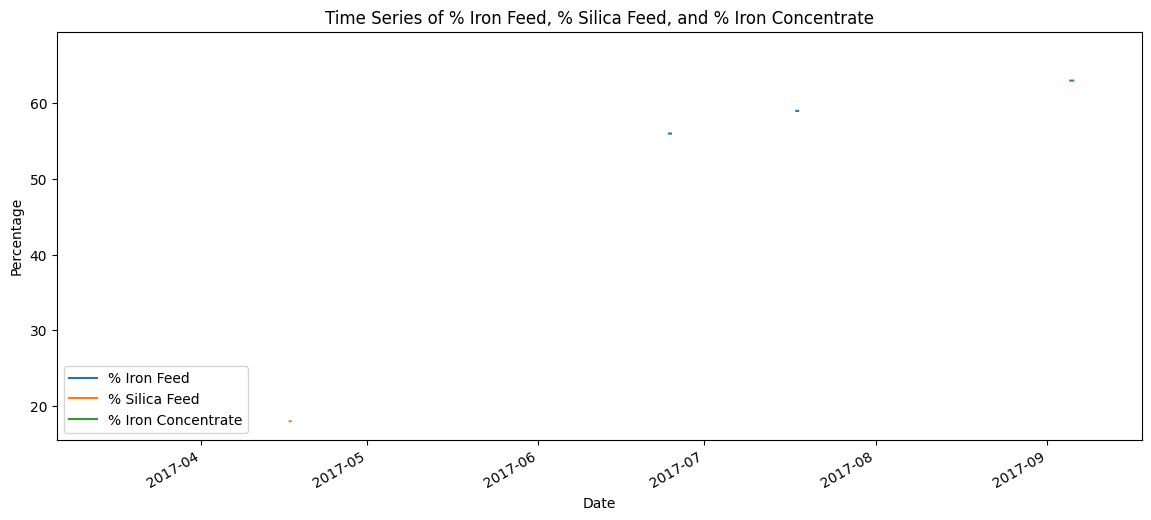

In [44]:
# Convert 'date' to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Plot time series
df[['% Iron Feed', '% Silica Feed', '% Iron Concentrate']].plot(figsize=(14, 6))
plt.title('Time Series of % Iron Feed, % Silica Feed, and % Iron Concentrate')
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.show()


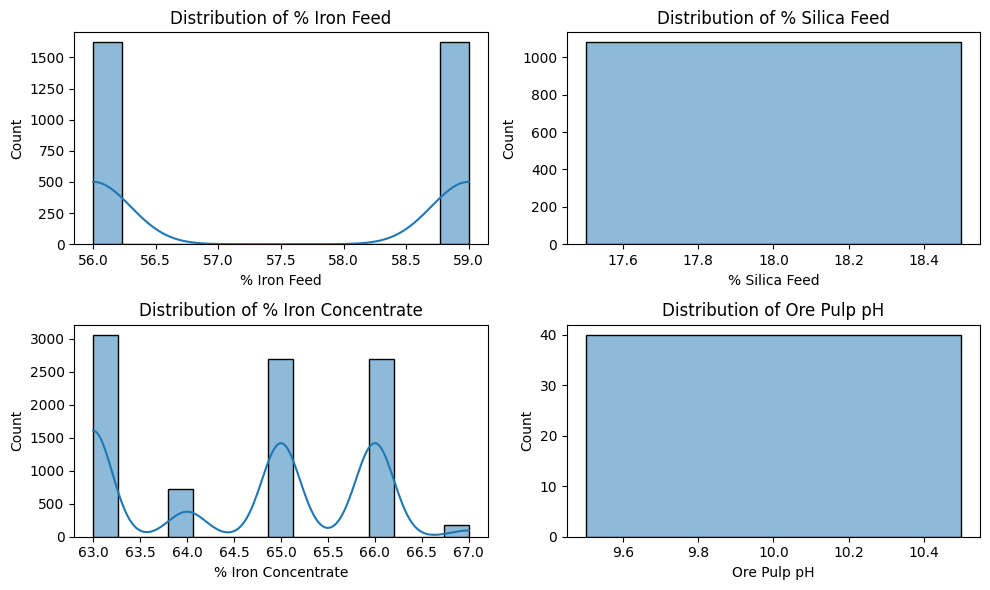

In [45]:
# Plot distribution of key features
features = ['% Iron Feed', '% Silica Feed', '% Iron Concentrate', 'Ore Pulp pH']
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


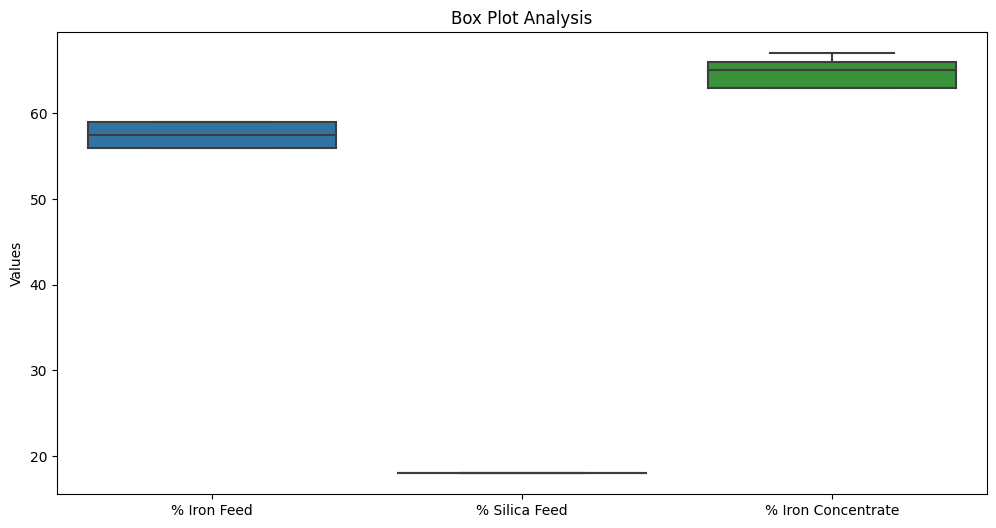

In [47]:
# Box plot for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['% Iron Feed', '% Silica Feed', '% Iron Concentrate']])
plt.title('Box Plot Analysis')
plt.ylabel('Values')
plt.show()



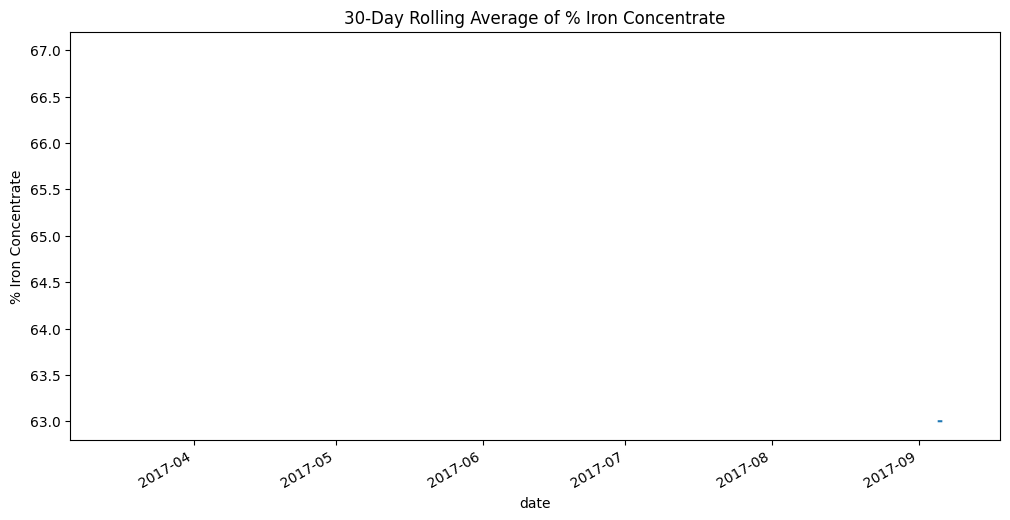

In [49]:
# 30-day rolling average of % Iron Concentrate
df['% Iron Concentrate Rolling'] = df['% Iron Concentrate'].rolling(window=30).mean()

# Plot rolling average
df['% Iron Concentrate Rolling'].plot(figsize=(12, 6))
plt.title('30-Day Rolling Average of % Iron Concentrate')
plt.ylabel('% Iron Concentrate')
plt.show()



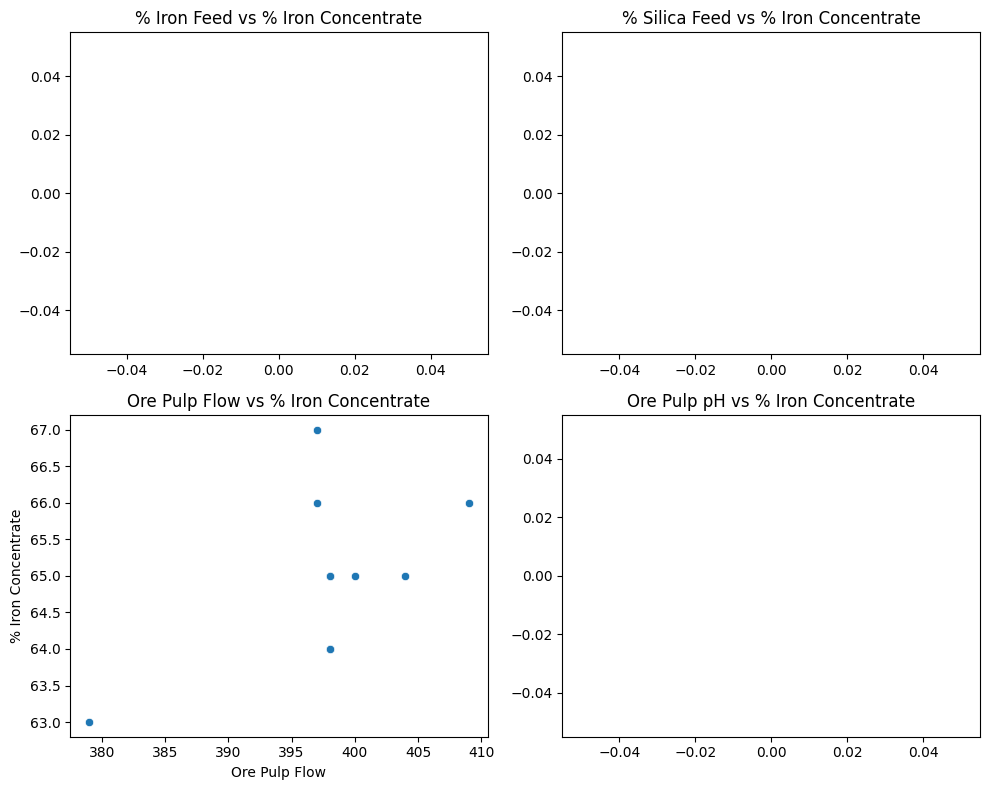

In [50]:
# Scatter plots of features with target
features = ['% Iron Feed', '% Silica Feed', 'Ore Pulp Flow', 'Ore Pulp pH']
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['% Iron Concentrate'])
    plt.title(f'{feature} vs % Iron Concentrate')
plt.tight_layout()
plt.show()


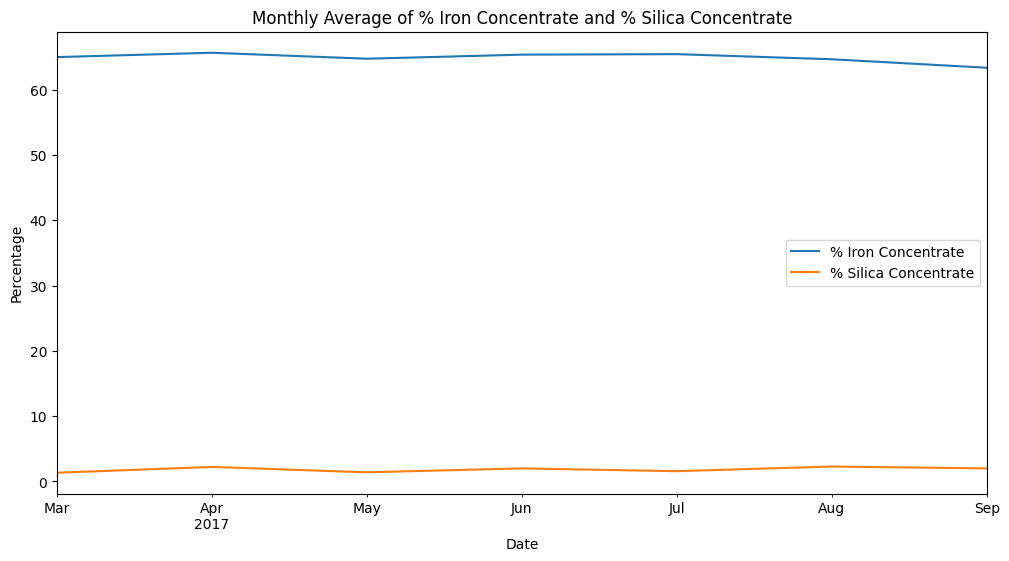

In [53]:
# Resample data monthly
monthly_data = df[['% Iron Concentrate', '% Silica Concentrate']].resample('M').mean()

# Plot monthly trends
monthly_data.plot(figsize=(12, 6))
plt.title('Monthly Average of % Iron Concentrate and % Silica Concentrate')
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.show()




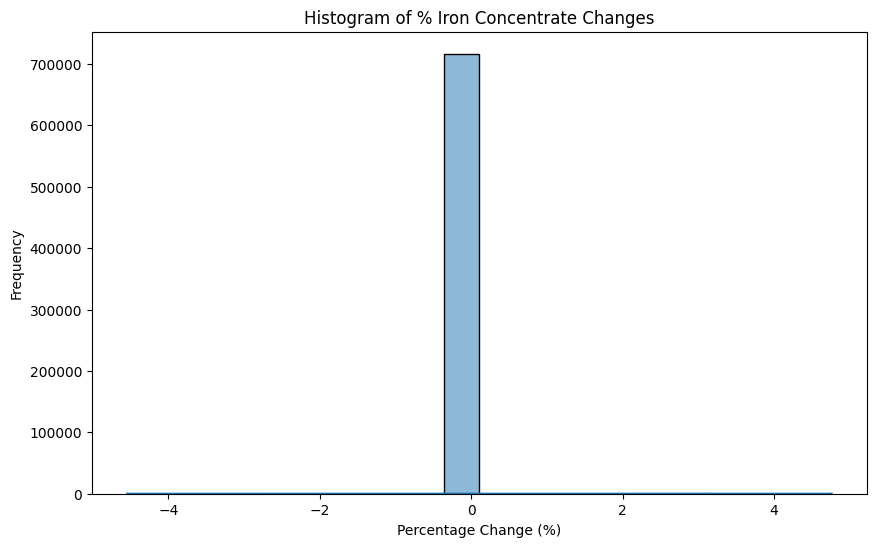

In [57]:
# Calculate percentage change
df['% Iron Concentrate Change'] = df['% Iron Concentrate'].pct_change() * 100

# Plot histogram of percentage changes
plt.figure(figsize=(10, 6))
sns.histplot(df['% Iron Concentrate Change'].dropna(), bins=20, kde=True)
plt.title('Histogram of % Iron Concentrate Changes')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.show()




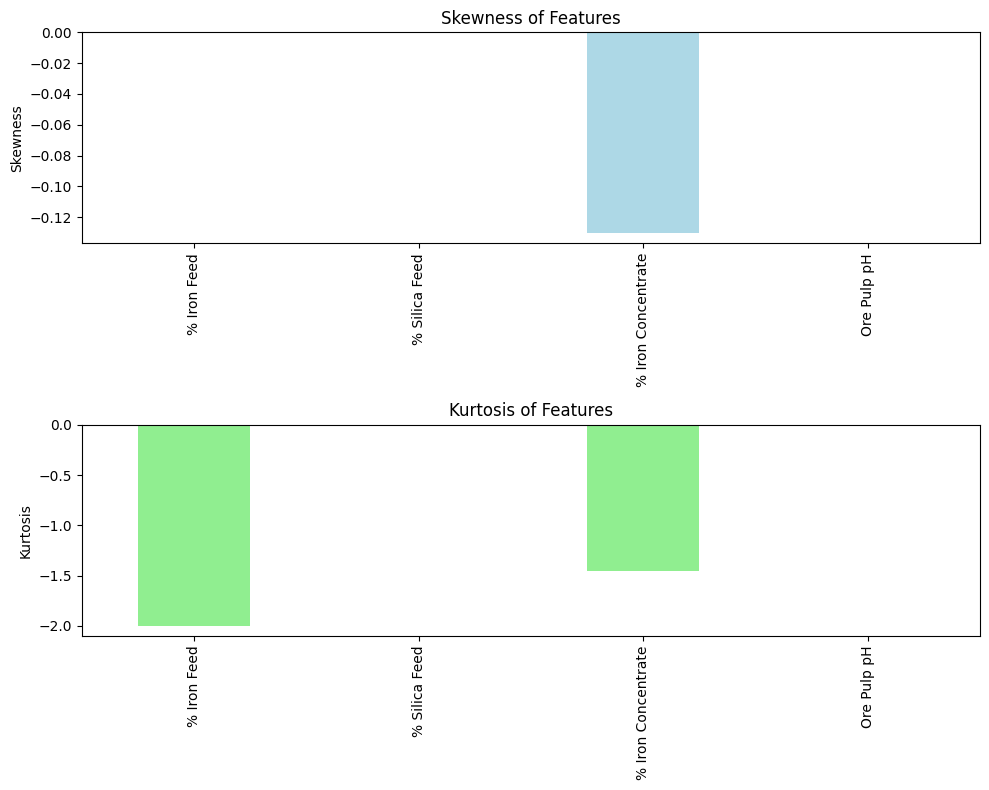

In [59]:
# Calculate skewness and kurtosis
skewness = df[['% Iron Feed', '% Silica Feed', '% Iron Concentrate', 'Ore Pulp pH']].skew()
kurtosis = df[['% Iron Feed', '% Silica Feed', '% Iron Concentrate', 'Ore Pulp pH']].kurt()

# Plot skewness and kurtosis
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
skewness.plot(kind='bar', ax=ax[0], color='lightblue')
ax[0].set_title('Skewness of Features')
ax[0].set_ylabel('Skewness')

kurtosis.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Kurtosis of Features')
ax[1].set_ylabel('Kurtosis')

plt.tight_layout()
plt.show()


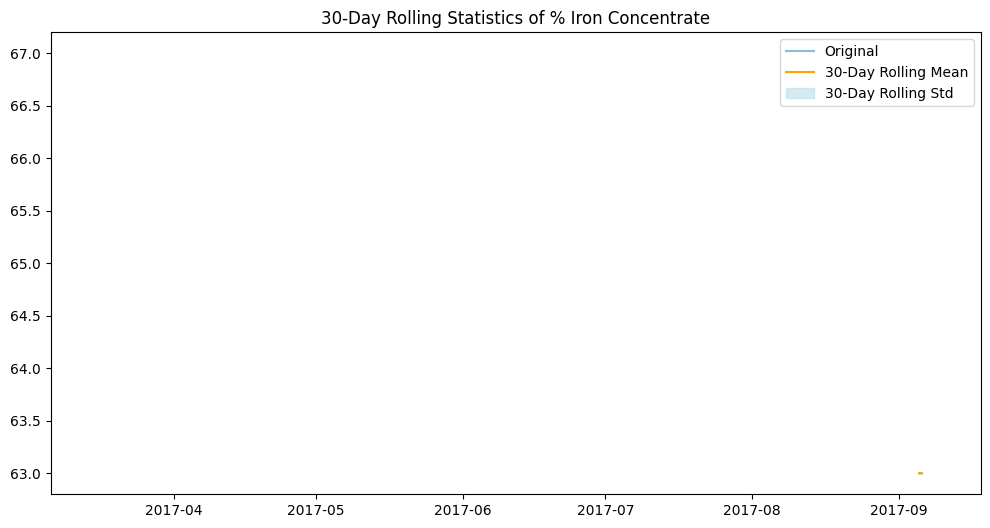

In [63]:
# Calculate rolling statistics
rolling_mean = df['% Iron Concentrate'].rolling(window=30).mean()
rolling_std = df['% Iron Concentrate'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['% Iron Concentrate'], label='Original', alpha=0.5)
plt.plot(df.index, rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.fill_between(df.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='lightblue', alpha=0.5, label='30-Day Rolling Std')
plt.title('30-Day Rolling Statistics of % Iron Concentrate')
plt.legend()
plt.show()




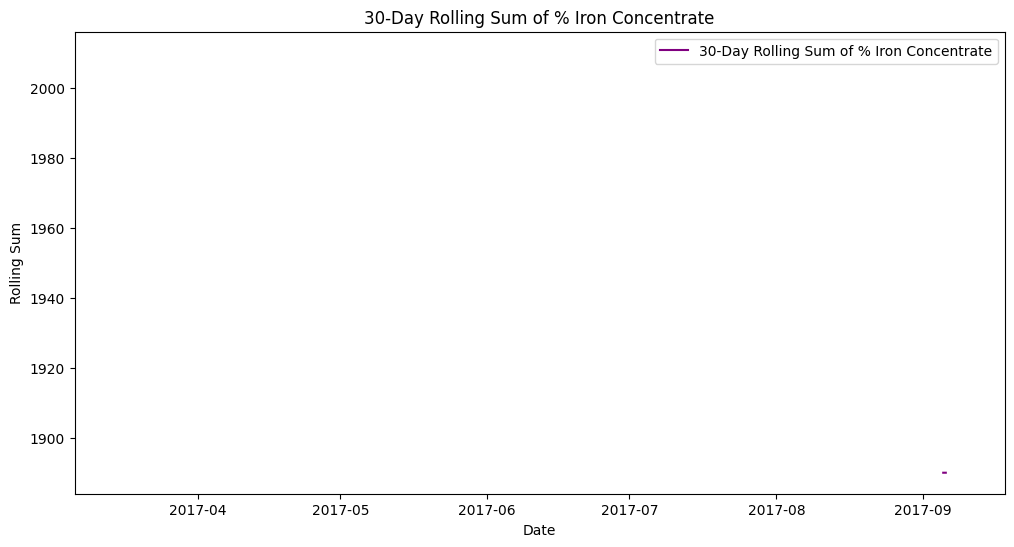

In [65]:
# Calculate the rolling sum of % Iron Concentrate
rolling_sum = df['% Iron Concentrate'].rolling(window=30).sum()

# Plot the rolling sum
plt.figure(figsize=(12, 6))
plt.plot(df.index, rolling_sum, label='30-Day Rolling Sum of % Iron Concentrate', color='purple')
plt.title('30-Day Rolling Sum of % Iron Concentrate')
plt.xlabel('Date')
plt.ylabel('Rolling Sum')
plt.legend()
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_6568\2362938235.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


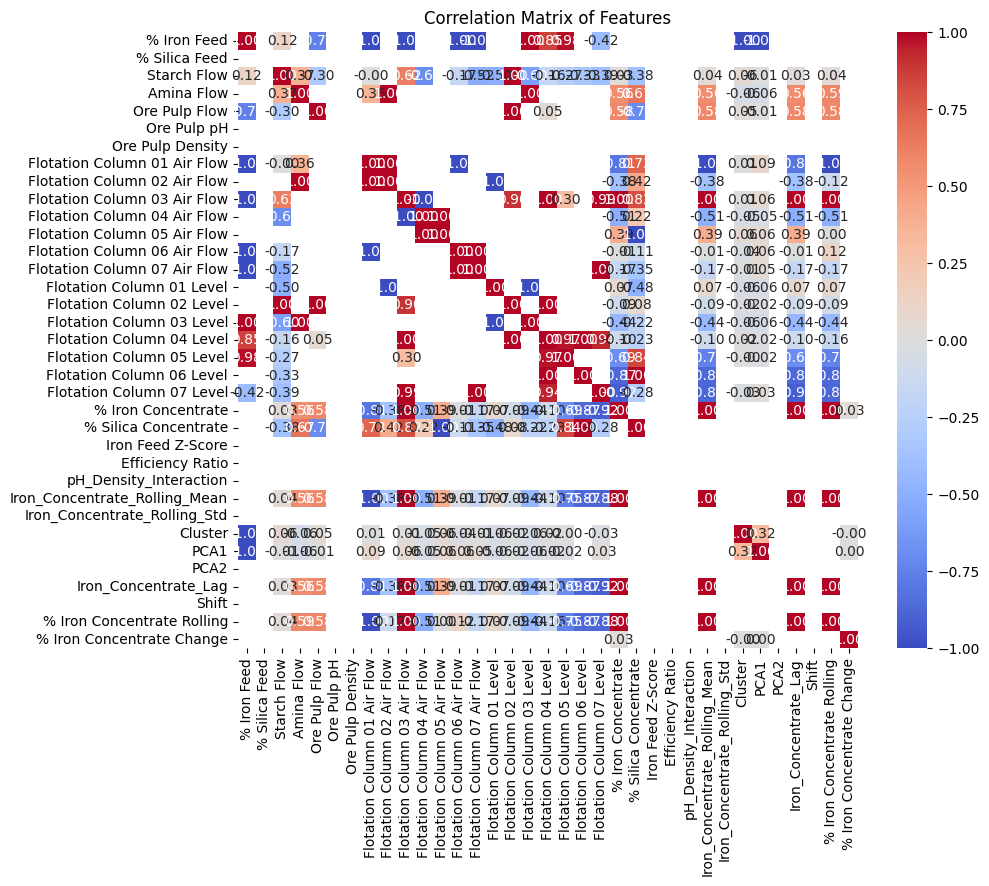

In [66]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


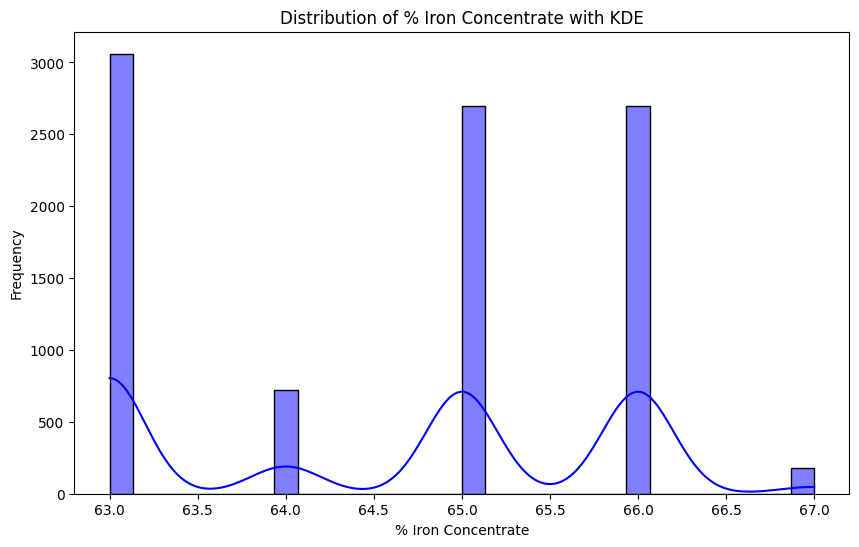

In [68]:
# Distribution plot of % Iron Concentrate with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['% Iron Concentrate'], bins=30, kde=True, color='blue')
plt.title('Distribution of % Iron Concentrate with KDE')
plt.xlabel('% Iron Concentrate')
plt.ylabel('Frequency')
plt.show()



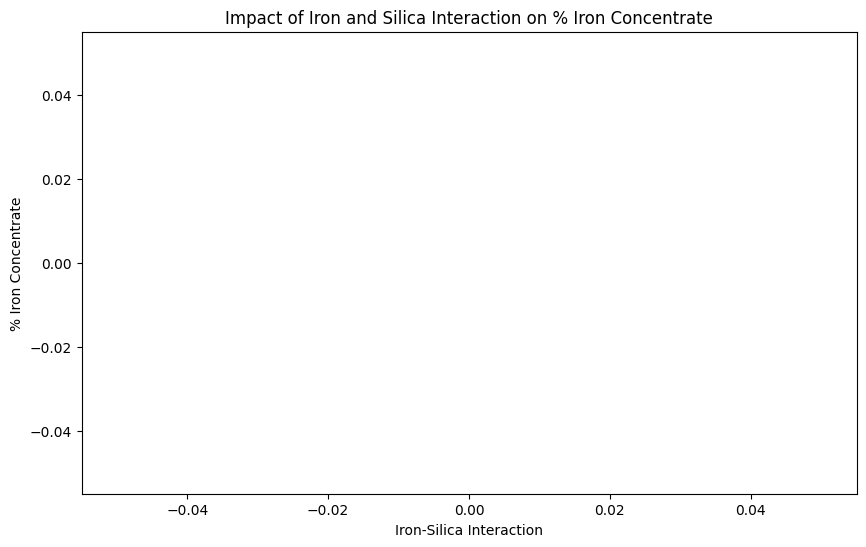

In [71]:
# Create interaction feature
df['Iron_Silica_Interaction'] = df['% Iron Feed'] * df['% Silica Feed']

# Plot interaction feature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Iron_Silica_Interaction', y='% Iron Concentrate', data=df)
plt.title('Impact of Iron and Silica Interaction on % Iron Concentrate')
plt.xlabel('Iron-Silica Interaction')
plt.ylabel('% Iron Concentrate')
plt.show()



Column Names: ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate', 'Iron Feed Z-Score', 'Efficiency Ratio', 'pH_Density_Interaction', 'Iron_Concentrate_Rolling_Mean', 'Iron_Concentrate_Rolling_Std', 'Cluster', 'PCA1', 'PCA2', 'Iron_Concentrate_Lag', 'Shift', '% Iron Concentrate Rolling', 'Iron_Level', '% Iron Concentrate Change', 'Iron_Feed_Level', 'Cumulative_Iron_Concentrate', 'Iron_Silica_Interaction', 'Rolling_Mean']
Potential date columns: []
Number of rows

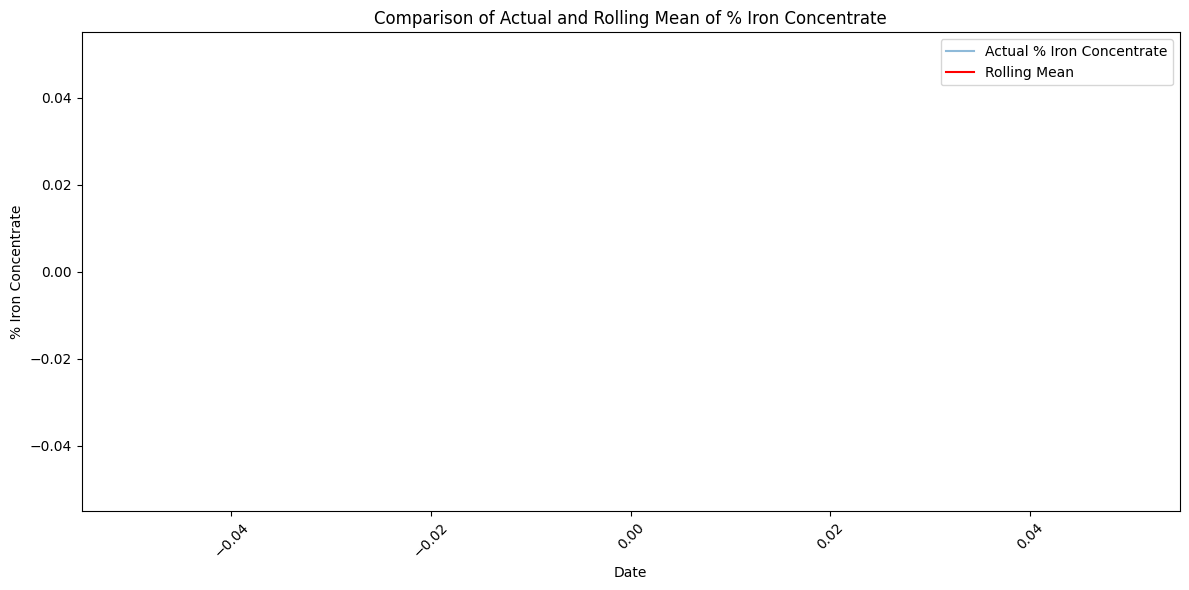

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame here
# df = pd.read_csv('your_file.csv')  # Uncomment and adjust this line to load your data

# Print the column names to check for 'date'
print("Column Names:", df.columns.tolist())  # Print as a list for clarity

# Check if there are any leading/trailing spaces in column names
df.columns = df.columns.str.strip()  # Clean column names

# Check for the presence of a date-like column
date_columns = df.select_dtypes(include=['object']).columns  # Look for object-type columns

# Display potential date columns for verification
print("Potential date columns:", date_columns.tolist())

# Attempt to convert the first potential date column found to datetime
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime
        print(f"Converted '{col}' to datetime.")
        # If conversion is successful, check for NaT values
        if df[col].isna().sum() > 0:
            print(f"'{col}' has NaT values after conversion.")
        else:
            print(f"'{col}' does not have NaT values after conversion.")
        # Break after the first successful conversion
        break
    except Exception as e:
        print(f"Could not convert '{col}': {e}")

# Set the variable for the date column if successfully converted
date_column = col if col in df.columns else None

if date_column is None:
    raise ValueError("No suitable date column found in the DataFrame.")

# Drop rows with NaT in the chosen date column or '% Iron Concentrate'
df = df.dropna(subset=[date_column, '% Iron Concentrate'])

# Check the number of remaining rows
print("Number of rows after dropping NaT values:", len(df))

# Calculate rolling mean if there are enough data points
if len(df) >= 30:
    df['Rolling_Mean'] = df['% Iron Concentrate'].rolling(window=30).mean()
else:
    # Use a smaller rolling window if there are fewer than 30 data points
    window_size = len(df) - 1 if len(df) > 1 else 1  # Ensure window size is at least 1
    print(f"Not enough data points for a window of 30, using a window of {window_size}.")
    df['Rolling_Mean'] = df['% Iron Concentrate'].rolling(window=window_size).mean()

# Plot actual vs rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df[date_column], df['% Iron Concentrate'], label='Actual % Iron Concentrate', alpha=0.5)
plt.plot(df[date_column], df['Rolling_Mean'], label='Rolling Mean', color='red')
plt.title('Comparison of Actual and Rolling Mean of % Iron Concentrate')
plt.xlabel('Date')
plt.ylabel('% Iron Concentrate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout for better fitting
plt.show()
